In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig = plt.figure(figsize=(6.5, 6.5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return fig

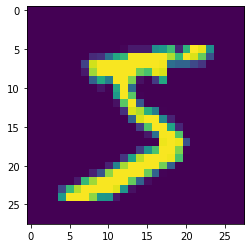

In [32]:
# Reshape data to 60000, 28, 28

(Xtrain,ytrain),(Xtest,ytest) = keras.datasets.mnist.load_data()

plt.imshow(Xtrain[0])

# Create validation set

In [18]:
Ntrain=40000

Xvalid=Xtrain[Ntrain:]*1. # "*1."→ to convert to float
yvalid=ytrain[Ntrain:]
Xtrain=Xtrain[:Ntrain]*1.
ytrain=ytrain[:Ntrain]
Xtest=Xtest*1.

print('Xtrain ->' + str(Xtrain.shape))
print('Xvalid ->' + str(Xvalid.shape))
print('Xtest ->' + str(Xtest.shape))

Xtrain ->(40000, 28, 28)
Xvalid ->(20000, 28, 28)
Xtest ->(10000, 28, 28)


# Convert data to vectors

In [19]:
ytrainB=keras.utils.to_categorical(ytrain)
yvalidB=keras.utils.to_categorical(yvalid)
ytestB=keras.utils.to_categorical(ytest)

# Normalize

In [20]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler().fit(Xtrain)
Xtrain=sc.transform(Xtrain)
XvalidN=sc.transform(Xvalid)
XtestN=sc.transform(Xtest)

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [21]:
nn = keras.Sequential()
nn.add(keras.layers.Flatten(input_shape=(28, 28)))
nn.add(keras.layers.Dense(50, activation="tanh"))
nn.add(keras.layers.Dense(10,activation='softmax'))

In [24]:
nn.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
train=nn.fit(Xtrain, ytrainB, epochs=10 ,batch_size=1024,validation_data=(Xvalid, yvalidB))

Epoch 1/10
40/40 [==============================] - 1s 37ms/step - loss: 1.6470 - accuracy: 0.4721 - val_loss: 0.9797 - val_accuracy: 0.7225
Epoch 2/10
40/40 [==============================] - 1s 22ms/step - loss: 0.8016 - accuracy: 0.7746 - val_loss: 0.6763 - val_accuracy: 0.8105
Epoch 3/10
40/40 [==============================] - 1s 21ms/step - loss: 0.6114 - accuracy: 0.8266 - val_loss: 0.5609 - val_accuracy: 0.8402
Epoch 4/10
40/40 [==============================] - 1s 20ms/step - loss: 0.5110 - accuracy: 0.8537 - val_loss: 0.4843 - val_accuracy: 0.8608
Epoch 5/10
40/40 [==============================] - 1s 23ms/step - loss: 0.4557 - accuracy: 0.8695 - val_loss: 0.4293 - val_accuracy: 0.8749
Epoch 6/10
40/40 [==============================] - 1s 23ms/step - loss: 0.4104 - accuracy: 0.8802 - val_loss: 0.4105 - val_accuracy: 0.8810
Epoch 7/10
40/40 [==============================] - 1s 23ms/step - loss: 0.3888 - accuracy: 0.8874 - val_loss: 0.3833 - val_accuracy: 0.8879
Epoch 8/10
40

# Plot training loss history

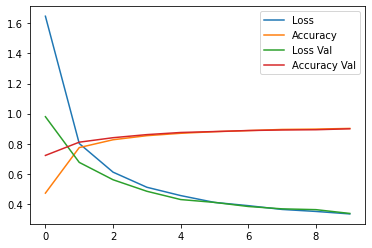

In [30]:
h=train.history
plt.plot(h["loss"])
plt.plot(h["accuracy"])
plt.plot(h["val_loss"])
plt.plot(h["val_accuracy"])
plt.legend(['Loss', 'Accuracy', 'Loss Val', 'Accuracy Val'])

Confusion matrix, without normalization
None


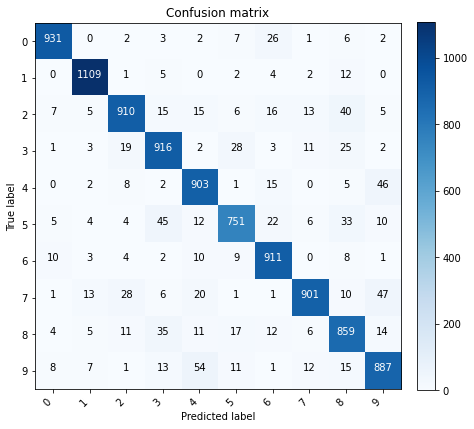

In [33]:
from sklearn.metrics import confusion_matrix
yOut=nn.predict(Xtest)
ytestPred=np.argmax(yOut,axis=1)
print(plot_confusion_matrix(confusion_matrix(ytest,ytestPred), ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))


# Saving keras model

In [36]:
nn.save('test_model')

INFO:tensorflow:Assets written to: test_model\assets


In [42]:
from tensorflow.keras.models import load_model

nn=load_model('test_model') #HDF5 model file

h = nn.history
plt.plot(h["loss"])
plt.plot(h["accuracy"])
plt.plot(h["val_loss"])
plt.plot(h["val_accuracy"])
plt.legend(['Loss', 'Accuracy', 'Loss Val', 'Accuracy Val'])

TypeError: 'NoneType' object is not subscriptable